# data preprocessing

In [1]:
# import modules
import pandas as pd

# load data
data = pd.read_csv("cleaned_data.csv")
print("---------- clean data ----------")
display(data.head(5))
print(data.shape)


---------- clean data ----------


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,2,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,2,0,0,2,3000,0.0,66.000000,360.0,1.0,2,1
3,1,2,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


(535, 12)


# model training

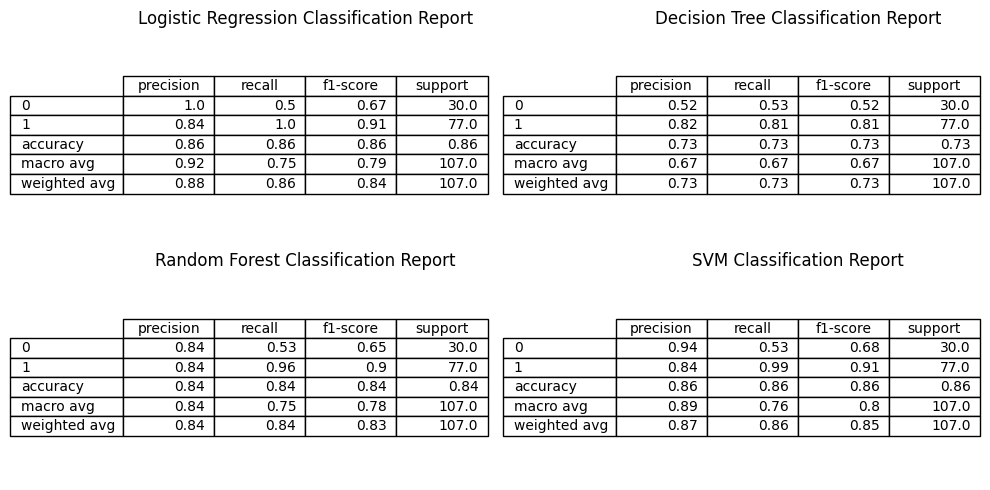

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Split the data into features and target
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# we only want to scale numeric columns and not categorical columns
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Scale only the specified columns
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

# Prepare the classification reports
reports = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    reports[name] = pd.DataFrame(report).transpose()

# Plot the reports in a "cube" layout (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

for ax, (name, report) in zip(axes.flatten(), reports.items()):
    ax.axis('off')
    ax.table(cellText=report.round(2).values, colLabels=report.columns, rowLabels=report.index, loc='center')
    ax.set_title(f"{name} Classification Report", fontsize=12)

plt.tight_layout()
plt.show()

# ROC curve

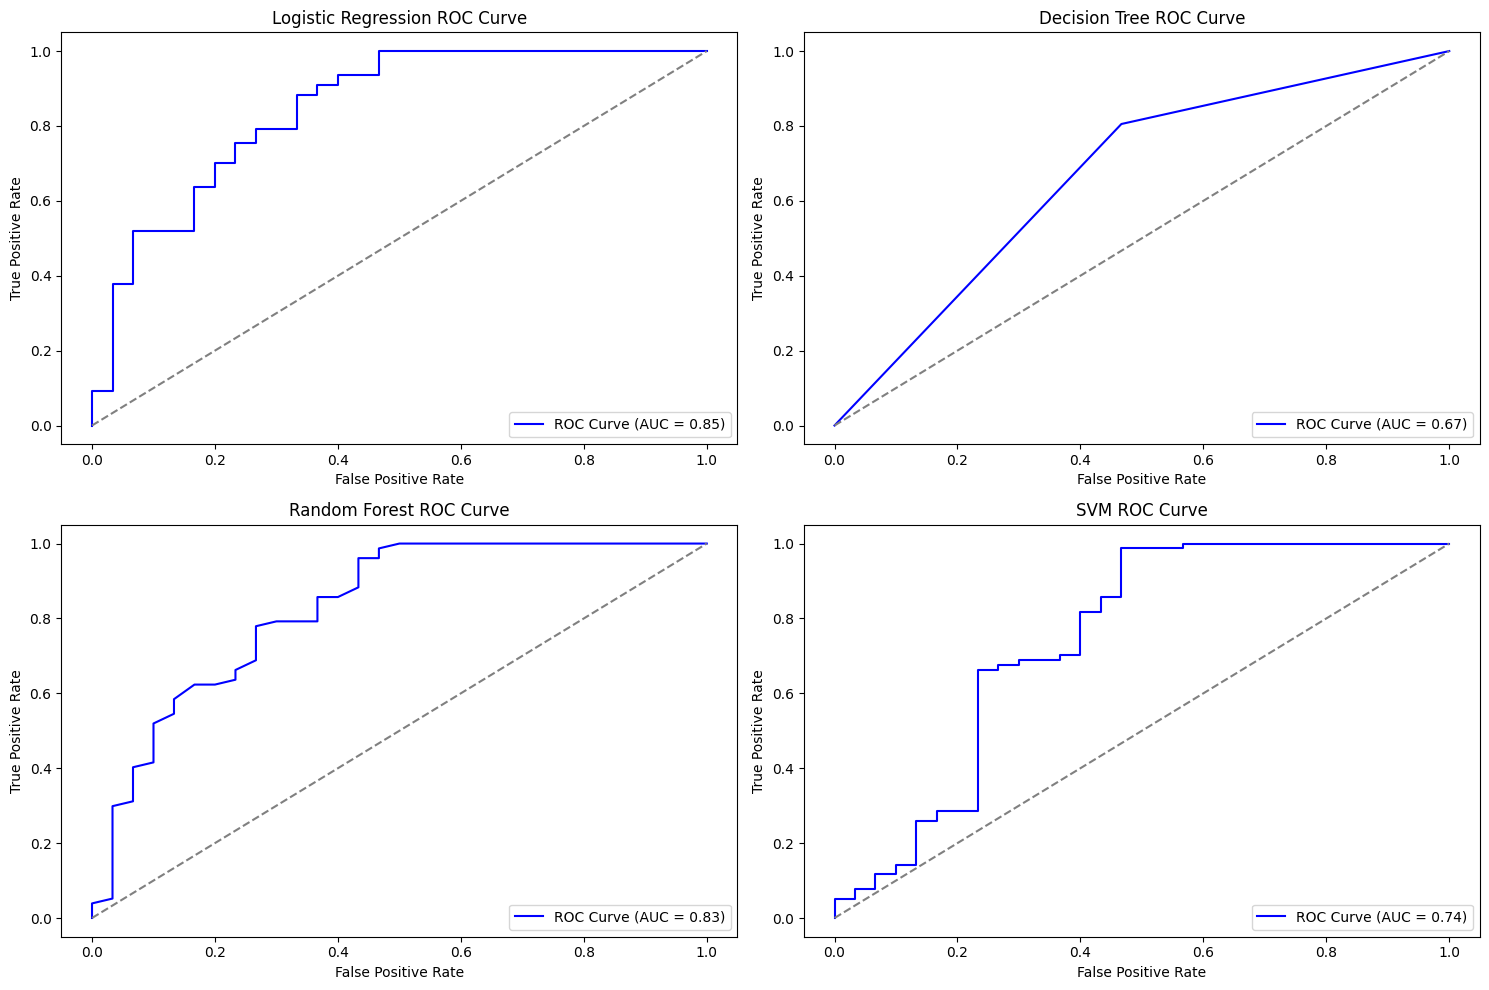

In [3]:
from sklearn.metrics import roc_curve, auc

# Prepare the ROC curves for each model
roc_data = {}
for name, model in models.items():
    # Get probabilities for positive class (if supported)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVM without `predict_proba`, use `decision_function`
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

# Plot the ROC curves in a 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, (name, (fpr, tpr, roc_auc)) in zip(axes.flatten(), roc_data.items()):
    ax.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
    ax.set_title(f"{name} ROC Curve")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()